In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob 
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
EMO = "/content/drive/MyDrive/Speech Emotion analysis/Emo-db/"
# Run one example 
dir_list = os.listdir(EMO)
dir_list[0:5]

['08a01Ab.wav', '12a01Fb.wav', '03a01Fa.wav', '09a01Fa.wav', '08a01Na.wav']

In [4]:

# Get the data location for EMO
dir_list = os.listdir(EMO)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if  (i[-6:-5]=='W') or (i[-6:-5]=='E') :
        emotion.append('Angry')
    elif i[-6:-5]=='F':
        emotion.append('Happy')
    elif (i[-6:-5]=='L') or (i[-6:-5]=='T'):
        emotion.append('Sad')
    elif i[-6:-5]=='A':
        emotion.append('Fear')
    elif i[-6:-5]=='N':
        emotion.append('Neutral')
    else:
        emotion.append('Unknown') 
    path.append(EMO + i)

# Now check out the label count distribution 
EMO_df = pd.DataFrame(emotion, columns = ['emotion'])
EMO_df['source'] = 'EMO'
EMO_df = pd.concat([EMO_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
EMO_df.emotion.value_counts()


Angry      173
Sad        143
Neutral     79
Happy       71
Fear        69
Name: emotion, dtype: int64

In [5]:

# Get the data location for EMO
dir_list = os.listdir(EMO)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if  (i[-6:-5]=='W') :
        emotion.append('Angry')
    elif (i[-6:-5]=='E') :
        emotion.append('Disgust')    
    elif i[-6:-5]=='F':
        emotion.append('Happy')
    elif (i[-6:-5]=='L') :
        emotion.append('Boredom')
    elif (i[-6:-5]=='T') :
        emotion.append('Sadness') 
    elif i[-6:-5]=='A':
        emotion.append('Fear')
    elif i[-6:-5]=='N':
        emotion.append('Neutral')
    else:
        emotion.append('Unknown') 
    path.append(EMO + i)

# Now check out the label count distribution 
EMO_df = pd.DataFrame(emotion, columns = ['emotion'])
EMO_df['source'] = 'EMO'
EMO_df = pd.concat([EMO_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
EMO_df.emotion.value_counts()


Angry      127
Boredom     81
Neutral     79
Happy       71
Fear        69
Sadness     62
Disgust     46
Name: emotion, dtype: int64

In [6]:
df = pd.concat([EMO_df], axis = 0)
print(df.emotion.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

Angry      127
Boredom     81
Neutral     79
Happy       71
Fear        69
Sadness     62
Disgust     46
Name: emotion, dtype: int64


In [7]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("./Data_path.csv")
ref.head(30)

,emotion,source,path
0,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis...
1,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...
2,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...
3,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...
4,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis...
5,Angry,EMO,/content/drive/MyDrive/Speech Emotion analysis...
6,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...
7,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis...
8,Angry,EMO,/content/drive/MyDrive/Speech Emotion analysis...
9,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...


In [8]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
df.sample(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,emotion,source,path
458,Disgust,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/13b10Ec.wav
235,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/10a07Ad.wav
281,Sadness,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/03b02Tb.wav
55,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/10a02Ab.wav
284,Sadness,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08b02Tc.wav
...,...,...,...
60,Sadness,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a02Tb.wav
452,Angry,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/10b10Wa.wav
204,Boredom,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/14a05Lb.wav
371,Sadness,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/15b03Tc.wav


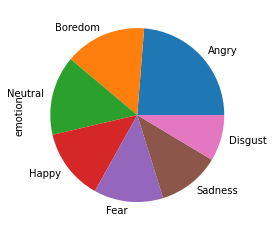

In [9]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie') 

In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

535


,Features
0,"[-3.020548105239868, -5.986682891845703, -17.65738296508789, -15.65730094909668, -15.12962818145752, -15.039176940917969, -15.331384658813477, -14.618766784667969, -14.647868156433105, -15.893167495727539, -16.321304321289062, -16.78694725036621, -15.868365287780762, -13.939315795898438, -12.105884552001953, -12.854204177856445, -13.878453254699707, -15.838191032409668, -17.212888717651367, -14.871292114257812, -12.63183879852295, -13.500885009765625, -15.568746566772461, -14.775090217590332, -16.93557357788086, -17.810428619384766, -8.799540519714355, -4.3315043449401855, -4.042933940887451, -8.786327362060547, -12.521449089050293, -14.641298294067383, -13.75732707977295, -12.103842735290527, -10.877647399902344, -11.437983512878418, -9.468372344970703, -9.869132041931152, -13.514001846313477, -9.438905715942383, -6.065412998199463, -6.006787300109863, -9.120977401733398, -12.805081367492676, -13.633074760437012, -14.039316177368164, -12.474197387695312, -14.707188606262207, -16.328716278076172, -13.983403205871582, -13.461906433105469, -14.290181159973145, -11.067129135131836, -9.4396390914917, -10.25782299041748, -12.832815170288086, -14.47233772277832, -15.180559158325195, -15.026118278503418, -16.440393447875977, -16.871919631958008, -16.227798461914062, -15.772287368774414, -15.051045417785645, -16.76930809020996, -15.759112358093262, -12.111649513244629, -11.299077987670898, -14.4454984664917, -13.920129776000977, -13.106307983398438, -13.9061918258667, -15.664796829223633, -16.918140411376953, -17.58910369873047, -15.499702453613281, -12.670782089233398, -8.358739852905273, -3.781482219696045, -4.170160293579102, -7.698156833648682, -9.289326667785645, -11.01113510131836, -9.088045120239258, -9.548360824584961, -10.905054092407227, -11.694174766540527, -11.663125991821289, -11.92285442352295, -11.218873023986816, -10.992666244506836, -10.715929985046387, -11.608819961547852, -12.646204948425293, -11.574254989624023, -11.507253646850586, -11.179191589355469, -9.480924606323242, -7.215013027191162, -7.65401554107666, ...]"
1,"[-7.918447017669678, -9.700054168701172, -13.931797981262207, -14.202247619628906, -15.660321235656738, -14.658056259155273, -14.20276165008545, -14.460031509399414, -14.984807968139648, -15.091924667358398, -14.54084587097168, -15.216166496276855, -15.255208015441895, -14.236157417297363, -14.092397689819336, -13.94226360321045, -13.650103569030762, -14.738187789916992, -14.968870162963867, -15.2593994140625, -15.638392448425293, -16.27830696105957, -16.53255844116211, -18.244434356689453, -15.061880111694336, -10.419013023376465, -9.546479225158691, -11.230467796325684, -10.435259819030762, -10.452363014221191, -11.54275894165039, -10.987311363220215, -10.832088470458984, -10.94855785369873, -11.137842178344727, -11.864161491394043, -11.051187515258789, -13.456280708312988, -21.57398796081543, -16.532928466796875, -12.666706085205078, -11.937260627746582, -13.08344554901123, -12.631006240844727, -11.728055953979492, -11.380725860595703, -11.213301658630371, -10.970061302185059, -11.192733764648438, -12.963197708129883, -13.101036071777344, -12.274778366088867, -12.584842681884766, -14.22430419921875, -18.949295043945312, -16.44747543334961, -13.400530815124512, -10.26575756072998, -9.083967208862305, -10.074304580688477, -9.411404609680176, -10.016633033752441, -11.534296035766602, -11.844507217407227, -11.385453224182129, -12.399581909179688, -14.147883415222168, -13.348068237304688, -14.118375778198242, -16.05929183959961, -15.032766342163086, -12.1964750289917, -12.244417190551758, -18.667207717895508, -20.615827560424805, -20.06505584716797, -17.07769775390625, -16.66744613647461, -12.243195533752441, -9.06714153289795, -7.628981113433838, -9.873872756958008, -12.670413970947266, -13.123285293579102, -12.164233207702637, -11.204316139221191, -11.197726249694824, -10.449433326721191, -10.412951469421387, -10.420699119567871, -10.261754989624023, -10.488927841186523, -10.78761959075

In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530
0,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Ab.wav,-3.020548,-5.986683,-17.657383,-15.657301,-15.129628,-15.039177,-15.331385,-14.618767,-14.647868,-15.893167,-16.321304,-16.786947,-15.868365,-13.939316,-12.105885,-12.854204,-13.878453,-15.838191,-17.212889,-14.871292,-12.631839,-13.500885,-15.568747,-14.775090,-16.935574,-17.810429,-8.799541,-4.331504,-4.042934,-8.786327,-12.521449,-14.641298,-13.757327,-12.103843,-10.877647,-11.437984,-9.468372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/12a01Fb.wav,-7.918447,-9.700054,-13.931798,-14.202248,-15.660321,-14.658056,-14.202762,-14.460032,-14.984808,-15.091925,-14.540846,-15.216166,-15.255208,-14.236157,-14.092398,-13.942264,-13.650104,-14.738188,-14.968870,-15.259399,-15.638392,-16.278307,-16.532558,-18.244434,-15.061880,-10.419013,-9.546479,-11.230468,-10.435260,-10.452363,-11.542759,-10.987311,-10.832088,-10.948558,-11.137842,-11.864161,-11.051188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/03a01Fa.wav,-12.148096,-10.615553,-12.712873,-14.446485,-16.463127,-16.694599,-14.141665,-13.675298,-12.584769,-11.681584,-13.388962,-12.183250,-12.927635,-12.010310,-12.488223,-12.281133,-10.904417,-7.701503,-6.974416,-9.760631,-11.579659,-14.750325,-12.458921,-12.580654,-14.434855,-11.532041,-9.612966,-13.763952,-17.029312,-10.605392,-8.375902,-10.097012,-10.170818,-9.595808,-8.590012,-8.381210,-8.361083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/09a01Fa.wav,-21.099449,-19.989435,-18.420570,-20.035679,-23.943762,-24.360561,-25.801483,-26.790628,-27.184015,-26.479486,-25.002399,-19.198879,-19.337362,-22.273346,-23.260681,-24.573002,-22.738604,-23.259602,-21.463001,-20.125492,-18.720301,-19.311972,-21.306448,-14.221975,-12.133467,-14.362261,-18.788988,-20.078669,-20.371113,-21.616430,-22.374815,-20.397585,-18.411800,-16.427647,-17.536549,-21.042784,-24.957918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Na.wav,-1.496551,-3.419499,-7.935416,-7.311086,-7.160666,-9.339266,-12.268322,-10.383133,-5.322262,-3.457881,-4.181372,-6.407265,-8.701880,-9.840286,-9.872454,-8.859933,-6.923860,-6.467467,-9.949822,-12.851660,-7.610815,-4.910651,-4.581606,-5.679947,-6.201549,-5.697085,-6.098207,-6.235017,-5.901885,-6.347792,-6.399971,-5.966947,-4.426646,-3.779510,-4.354318,-4.541448,-3.546559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(535, 534)


,emotion,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530
0,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Ab.wav,-3.020548,-5.986683,-17.657383,-15.657301,-15.129628,-15.039177,-15.331385,-14.618767,-14.647868,-15.893167,-16.321304,-16.786947,-15.868365,-13.939316,-12.105885,-12.854204,-13.878453,-15.838191,-17.212889,-14.871292,-12.631839,-13.500885,-15.568747,-14.775090,-16.935574,-17.810429,-8.799541,-4.331504,-4.042934,-8.786327,-12.521449,-14.641298,-13.757327,-12.103843,-10.877647,-11.437984,-9.468372,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/12a01Fb.wav,-7.918447,-9.700054,-13.931798,-14.202248,-15.660321,-14.658056,-14.202762,-14.460032,-14.984808,-15.091925,-14.540846,-15.216166,-15.255208,-14.236157,-14.092398,-13.942264,-13.650104,-14.738188,-14.968870,-15.259399,-15.638392,-16.278307,-16.532558,-18.244434,-15.061880,-10.419013,-9.546479,-11.230468,-10.435260,-10.452363,-11.542759,-10.987311,-10.832088,-10.948558,-11.137842,-11.864161,-11.051188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/03a01Fa.wav,-12.148096,-10.615553,-12.712873,-14.446485,-16.463127,-16.694599,-14.141665,-13.675298,-12.584769,-11.681584,-13.388962,-12.183250,-12.927635,-12.010310,-12.488223,-12.281133,-10.904417,-7.701503,-6.974416,-9.760631,-11.579659,-14.750325,-12.458921,-12.580654,-14.434855,-11.532041,-9.612966,-13.763952,-17.029312,-10.605392,-8.375902,-10.097012,-10.170818,-9.595808,-8.590012,-8.381210,-8.361083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/09a01Fa.wav,-21.099449,-19.989435,-18.420570,-20.035679,-23.943762,-24.360561,-25.801483,-26.790628,-27.184015,-26.479486,-25.002399,-19.198879,-19.337362,-22.273346,-23.260681,-24.573002,-22.738604,-23.259602,-21.463001,-20.125492,-18.720301,-19.311972,-21.306448,-14.221975,-12.133467,-14.362261,-18.788988,-20.078669,-20.371113,-21.616430,-22.374815,-20.397585,-18.411800,-16.427647,-17.536549,-21.042784,-24.957918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Na.wav,-1.496551,-3.419499,-7.935416,-7.311086,-7.160666,-9.339266,-12.268322,-10.383133,-5.322262,-3.457881,-4.181372,-6.407265,-8.701880,-9.840286,-9.872454,-8.859933,-6.923860,-6.467467,-9.949822,-12.851660,-7.610815,-4.910651,-4.581606,-5.679947,-6.201549,-5.697085,-6.098207,-6.235017,-5.901885,-6.347792,-6.399971,-5.966947,-4.426646,-3.779510,-4.354318,-4.541448,-3.546559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion','source'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530
441,2.554508,0.332811,-4.323872,-3.829839,-3.784656,-2.037540,-1.917794,-5.298573,-7.020211,-1.899866,-1.378309,-4.354558,-6.183126,-5.151677,-4.774991,-4.441161,-3.334033,-5.521398,-9.956796,-14.268373,-13.486684,-12.487345,-12.416306,-13.461077,-13.310376,-12.386252,-12.904840,-10.328028,-4.756080,-3.034296,-5.064128,-5.325008,-5.263274,-6.551642,-6.748463,-5.768163,-6.189312,-7.353658,-8.506231,-8.241019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
321,2.089165,-0.869029,-9.188924,-8.600752,-7.945798,-8.212059,-9.180105,-11.523394,-12.272377,-11.079719,-11.026040,-11.491572,-12.772799,-10.767256,-10.109247,-10.814725,-11.614202,-11.155945,-11.057000,-11.005651,-9.620328,-8.054120,-9.059633,-9.709857,-9.671993,-11.193630,-12.564958,-10.200889,-5.718858,-5.431477,-11.441430,-15.691137,-11.800409,-6.749269,-5.857358,-7.483369,-9.553657,-8.959196,-9.383835,-7.423701,...,-16.412991,-14.946004,-14.428662,-13.675397,-11.212651,-8.197986,-6.278272,-5.903176,-5.845412,-5.876747,-7.46554,-8.890612,-9.864847,-10.185379,-10.732654,-11.958053,-12.402618,-14.549863,-18.085485,-20.594572,-20.117603,-18.629053,-19.049086,-19.125256,-17.715269,-15.240993,-13.151398,0.490659,0.462994,0.460401,0.469066,0.443637,0.466506,0.482066,0.562383,0.657408,0.619529,0.529884,0.498665,0.157187
417,-2.934747,-5.843897,-13.098154,-12.410578,-13.226273,-13.179068,-13.895154,-14.242437,-13.522264,-14.208282,-12.915482,-10.696589,-10.632620,-13.131693,-14.301102,-14.883982,-17.915287,-18.174442,-16.882879,-15.727458,-14.668940,-12.674065,-11.111204,-12.387131,-12.810652,-11.493021,-8.531486,-7.269910,-8.620557,-13.155832,-14.206990,-11.512987,-10.190485,-11.261065,-11.746965,-12.475977,-11.115122,-11.614677,-13.913315,-14.719620,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
297,-5.609528,-7.312801,-14.232816,-12.350847,-9.437327,-11.548978,-16.365490,-15.814787,-6.656770,-2.905777,-1.910529,-3.786168,-4.931828,-5.344381,-6.155732,-9.508997,-10.409574,-10.032432,-11.405154,-7.062002,-5.387671,-5.995267,-3.995456,-5.597924,-8.319826,-8.359507,-7.289312,-7.583453,-9.211688,-8.754756,-8.221228,-8.683862,-8.101833,-7.765058,-8.877947,-11.189970,-12.417665,-7.924088,-3.798265,-2.998463,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36,2.553626,1.221201,-1.486665,-1.536955,-1.987045,-3.232414,-3.002240,-1.677164,-1.775365,-2.228956,-2.631836,-4.095840,-6.954472,-8.644269,-11.591863,-12.821909,-4.524427,0.459214,1.685982,0.372662,1.162376,0.491954,-0.590146,-0.620091,-2.833821,-6.261988,-3.090545,-4.259115,-7.180827,-2.304492,0.242583,1.484846,0.872554,-0.779518,-0.810547,-1.147877,-1.438065,-0.244389,0.842554,-0.495751,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(428, 531, 1)
(107, 531, 1)


In [ ]:
lb.classes_

array(['Angry', 'Fear', 'Happy', 'Neutral', 'Sad'], dtype=object)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(X_train,y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 531, 256)          2304      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 524, 256)          524544    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 262, 256)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 262, 256)          1024      
_________________________________________________________________
dropout (Dropout)            (None, 262, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 262, 256)          524544    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 131, 256)          0

4/4 [==============================] - 0s 14ms/step - loss: 3.4769 - accuracy: 0.5794
Loss of the model is -  3.4769375324249268
4/4 [==============================] - 0s 14ms/step - loss: 3.4769 - accuracy: 0.5794
Accuracy of the model is -  57.94392228126526 %


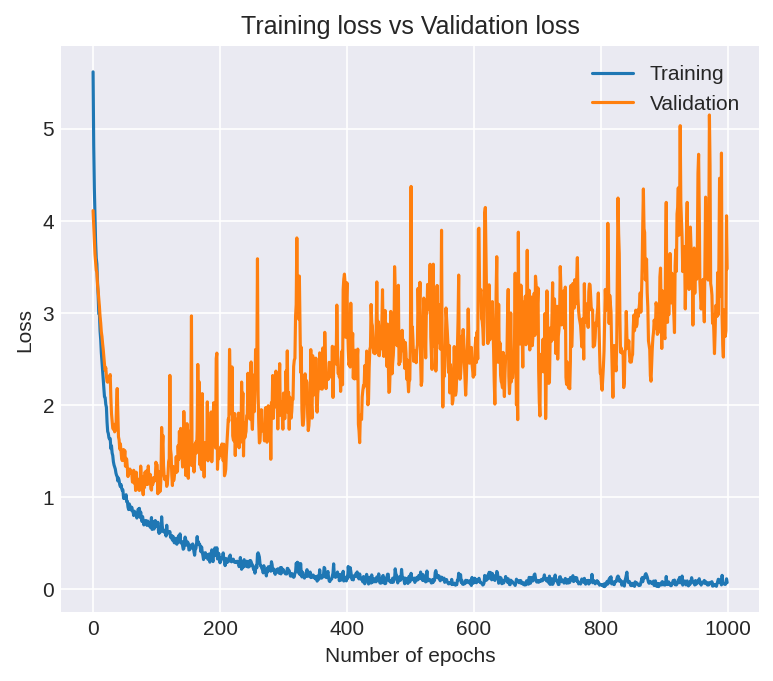

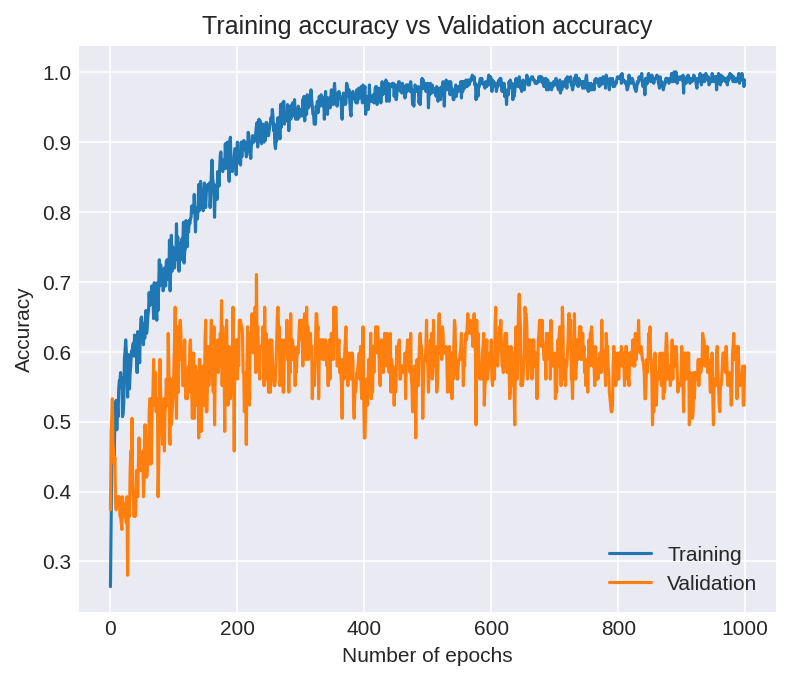

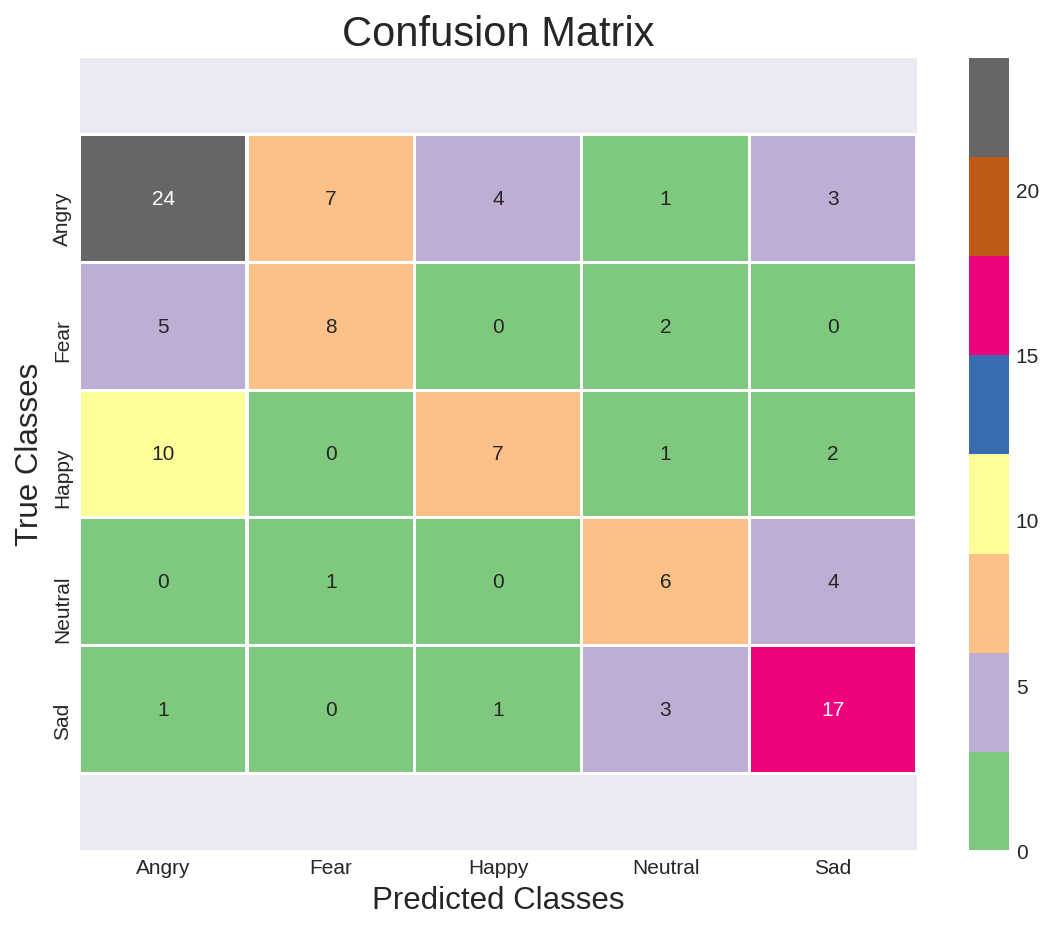

              precision    recall  f1-score   support

       Angry       0.60      0.62      0.61        39
        Fear       0.50      0.53      0.52        15
       Happy       0.58      0.35      0.44        20
     Neutral       0.46      0.55      0.50        11
         Sad       0.65      0.77      0.71        22

    accuracy                           0.58       107
   macro avg       0.56      0.56      0.55       107
weighted avg       0.58      0.58      0.57       107



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad']))

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd 
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df_mel))
df_mel.head()

535


,mel_spectrogram
0,"[-18.804665, -21.521597, -27.88592, -24.218561..."
1,"[-32.407764, -32.98968, -31.687258, -31.718386..."
2,"[-36.368206, -32.799015, -33.12451, -35.60933,..."
3,"[-46.121796, -42.230083, -31.603167, -25.71852..."
4,"[-14.672596, -17.095194, -24.047354, -28.71509..."


In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
0,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis...,-18.804665,-21.521597,-27.885920,-24.218561,-22.943007,-25.174477,-26.425821,-27.606398,-29.549362,-31.485579,-32.047272,-30.873663,-28.708744,-23.172752,-14.614209,-11.226435,-12.470586,-16.853674,-18.633949,-21.549841,-28.700449,-35.497490,-37.798492,-38.668697,-44.132996,-47.179703,-24.534758,-14.004228,-12.125667,-14.669782,-16.068775,-14.983406,-13.359447,-13.777181,-16.891363,-22.120945,-22.772476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...,-32.407764,-32.989681,-31.687258,-31.718386,-27.894558,-21.176987,-18.267330,-19.207891,-20.612478,-22.750566,-24.493120,-23.486425,-19.540703,-18.870535,-20.576288,-22.270704,-20.765713,-21.762819,-27.541477,-40.208279,-46.904926,-47.860714,-47.553806,-50.302410,-32.184231,-18.020641,-10.971907,-8.587826,-8.391054,-8.129248,-8.916072,-10.246510,-12.216118,-17.439548,-25.416601,-29.751011,-32.402962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...,-36.368206,-32.799015,-33.124512,-35.609329,-37.013054,-36.065643,-30.478870,-25.162720,-24.200771,-25.609528,-27.598541,-29.231234,-28.609461,-27.733837,-26.992952,-25.937771,-24.892262,-19.700335,-18.812206,-19.070112,-19.379847,-21.385183,-24.153214,-27.070450,-29.167181,-29.226816,-32.317734,-42.996925,-49.439175,-24.559893,-18.466587,-19.343744,-17.820953,-15.435842,-12.484180,-9.015182,-9.040695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis...,-46.121796,-42.230083,-31.603167,-25.718521,-25.146307,-27.747725,-30.559526,-32.077904,-33.075161,-34.002197,-33.009682,-24.742752,-20.337015,-22.896070,-27.084166,-24.767179,-21.932322,-26.415136,-36.652470,-38.335716,-36.294380,-39.304523,-47.361305,-25.687342,-14.328912,-9.082014,-10.017227,-12.665390,-12.624085,-13.286325,-11.966488,-12.537272,-18.323147,-25.694345,-31.400402,-37.693184,-47.064201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis...,-14.672596,-17.095194,-24.047354,-28.715092,-29.135523,-33.275944,-44.504860,-27.663935,-13.682248,-9.503767,-10.787056,-12.582223,-15.174791,-18.706068,-20.964104,-23.312185,-22.561010,-25.565147,-38.795200,-48.254826,-23.067911,-13.832280,-13.614727,-18.464849,-20.866573,-21.200768,-25.261509,-29.797005,-30.029488,-28.760075,-25.979498,-21.505941,-16.722641,-13.732438,-14.346529,-13.335444,-11.233666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258
441,-13.191162,-17.412943,-24.742369,-25.107763,-17.959257,-12.717484,-12.783646,-15.346880,-15.822100,-10.258445,-7.173550,-7.117704,-8.526874,-8.349070,-8.227021,-8.822204,-11.211225,-20.789053,-34.036331,-42.310688,-44.034744,-39.574261,-36.159142,-33.453831,-29.980265,-26.202166,-24.087250,-22.496914,-15.548408,-10.719373,-10.887609,-11.767865,-11.220654,-11.309484,-11.972555,-14.048397,-13.898256,-13.996491,-14.898280,-17.143282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,-1.592765,-2.214412,-4.411089,-4.603294,-8.027392,-15.837214,-19.350735,-19.892469,-21.878798,-21.020311,-19.273434,-18.574322,-19.740133,-15.958378,-12.353106,-10.549204,-10.782230,-12.114081,-11.630973,-10.334807,-10.133203,-10.327623,-10.550451,-11.779170,-13.768473,-15.215566,-15.886226,-14.640537,-13.317152,-19.360727,-39.222324,-44.826099,-20.196547,-9.857969,-8.191421,-8.862311,-6.713652,-5.551036,-5.385560,-6.958497,...,-12.014832,-12.266513,-12.751473,-16.449165,-21.407909,-22.443647,-18.847073,-15.85805,-14.654199,-14.714111,-16.135056,-17.128801,-17.32538,-16.412991,-14.946004,-14.428662,-13.675397,-11.212651,-8.197986,-6.278272,-5.903176,-5.845412,-5.876747,-7.46554,-8.890612,-9.864847,-10.185379,-10.732654,-11.958053,-12.402618,-14.549863,-18.085485,-20.594572,-20.117603,-18.629053,-19.049086,-19.125256,-17.715269,-15.240993,-13.151398
417,-12.716684,-15.351578,-24.829851,-27.959824,-30.245256,-30.974468,-31.381561,-32.478737,-31.918455,-29.376293,-19.700954,-10.590706,-6.740655,-6.866120,-7.246089,-9.357801,-13.327457,-16.531403,-20.591827,-26.780699,-30.512318,-27.093277,-25.889893,-32.716293,-29.014315,-27.540586,-19.247074,-13.761534,-14.754523,-17.918625,-16.688475,-14.447861,-14.255684,-13.435139,-14.392236,-19.530188,-22.415804,-26.156948,-29.989460,-28.223837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,-20.364967,-18.610880,-17.983961,-16.277058,-16.297949,-23.436283,-39.288864,-29.974766,-10.909477,-5.081419,-3.588921,-4.342592,-5.321337,-5.092302,-5.843002,-7.711974,-7.439525,-6.974631,-6.682263,-7.361845,-9.800033,-14.259489,-14.091470,-14.954602,-16.044760,-16.780210,-18.428871,-20.193651,-22.561422,-23.766926,-24.323439,-25.028746,-25.630993,-26.376675,-26.852791,-28.205006,-29.845743,-22.047607,-13.895200,-10.148205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,-11.744615,-12.375156,-14.608455,-12.468637,-13.061885,-15.994761,-15.004396,-10.737443,-9.621335,-11.533262,-14.864107,-23.529078,-30.127514,-30.514605,-39.144562,-37.796673,-14.742793,-6.934121,-4.546621,-3.727728,-3.766431,-4.492877,-8.329901,-12.593942,-13.873358,-15.047528,-16.209633,-21.268467,-22.781462,-12.642288,-11.019477,-9.739347,-10.113716,-12.386333,-12.380766,-11.005539,-10.920540,-10.363463,-9.074458,-12.389512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,-6.723027,-8.061245,-10.093167,-9.288959,-8.547454,-9.199635,-10.364801,-11.329092,-11.611039,-13.349246,-16.629868,-21.148609,-21.104485,-21.864082,-21.262508,-20.508434,-20.684471,-20.639248,-20.511265,-21.299202,-23.469700,-24.914646,-26.326927,-28.141773,-29.240009,-30.610973,-31.570023,-31.505951,-29.737614,-28.254139,-28.847733,-30.905777,-29.305676,-27.477634,-30.214500,-36.489941,-43.652676,-44.198139,-20.398396,-14.406167,...,NaN,NaN,NaN,NaN,N

In [ ]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
(428, 259, 1)
(107, 259, 1)


In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(X_train,y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 345, 256)          2304      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 338, 256)          524544    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 169, 256)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 169, 256)          1024      
_________________________________________________________________
dropout (Dropout)            (None, 169, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 169, 256)          524544    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 84, 256)           0

In [10]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,emotion,source,path
0,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Ab.wav
1,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/12a01Fb.wav
2,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/03a01Fa.wav
3,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/09a01Fa.wav
4,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Na.wav


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


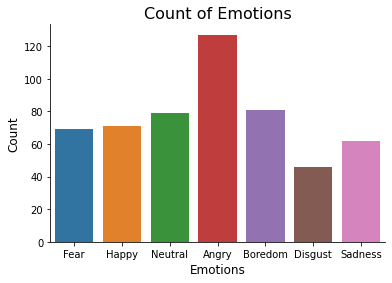

In [12]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show() 

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [ ]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
       
    return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [23]:
len(X), len(Y), data_path.path.shape

(2140, 2140, (535,))

In [24]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,labels
0,0.118058,0.565005,0.608090,0.683121,0.617558,0.536719,0.544609,0.565097,0.586288,0.556638,0.535788,0.521537,0.521607,-239.242264,93.311470,-47.721405,36.792530,-29.406725,30.540400,-26.404978,-2.567815,-6.565616,-9.454045,-2.605035,-2.645095,-1.123081,0.106191,0.233874,0.168767,0.088874,0.031072,0.031221,0.397871,9.459945,11.387362,9.485535,16.230631,59.399960,35.644787,12.259502,...,0.316787,0.537943,0.480110,0.708013,0.568656,0.385182,0.467830,0.359173,0.150270,0.237734,0.319602,0.218449,0.201142,0.186315,0.148083,0.223006,0.282373,0.311500,0.298508,0.445633,0.315118,0.306816,0.295273,0.172138,0.084325,0.015300,0.000683,0.000005,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,Fear
1,0.223846,0.614872,0.650169,0.746610,0.706722,0.629184,0.610035,0.605721,0.612143,0.597922,0.578391,0.576046,0.578608,-147.661047,37.268954,-9.147313,2.856454,-5.396443,7.592656,-9.065101,-8.561931,-3.483552,-6.445993,-4.345832,-0.880399,-4.257676,0.107788,0.261239,0.191692,0.104158,0.035951,0.041694,0.413809,9.545310,11.484239,9.633016,16.303318,59.392890,35.709547,12.279588,...,0.318891,0.551199,0.489859,0.719811,0.576342,0.393091,0.478251,0.367332,0.160039,0.250016,0.331470,0.232280,0.211204,0.198330,0.158159,0.232196,0.299742,0.327852,0.313199,0.451021,0.322473,0.308751,0.305011,0.177827,0.089465,0.024069,0.009651,0.008738,0.009002,0.008487,0.009315,0.008949,0.009531,0.008660,0.008474,0.008989,0.009252,0.009208,0.009274,Fear
2,0.129947,0.479741,0.530497,0.620380,0.701526,0.583356,0.489940,0.490483,0.528225,0.563035,0.543836,0.546025,0.488869,-277.763794,95.098206,-47.637703,32.853813,-31.094694,29.501434,-36.599606,1.347704,-9.349730,-6.262607,-6.858923,-2.220073,-6.736476,0.051398,0.055435,0.053554,0.021962,0.008748,0.006275,0.009445,0.538023,2.605234,6.074339,4.441233,12.834837,15.815147,3.699942,...,0.028623,0.037766,0.057624,0.076188,0.139738,0.186121,0.069324,0.072744,0.087065,0.060644,0.037706,0.048544,0.054933,0.064526,0.025585,0.028049,0.038903,0.045632,0.046279,0.077440,0.063345,0.075133,0.041121,0.053084,0.036935,0.021848,0.011327,0.000532,0.000014,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,0.000006,0.000007,Fear
3,0.128188,0.508703,0.586469,0.702197,0.594640,0.483643,0.516429,0.542251,0.579736,0.562298,0.553694,0.485373,0.484502,-277.886475,95.166748,-49.346569,33.691082,-31.111177,30.956291,-36.058765,-0.091696,-9.122845,-5.356777,-5.549081,-2.720793,-5.709476,0.053169,0.060399,0.044571,0.018921,0.008483,0.005051,0.012949,0.899411,4.496017,6.565965,3.993485,13.024792,14.767900,3.861615,...,0.018193,0.071796,0.110694,0.111856,0.195477,0.138269,0.076853,0.049649,0.074115,0.025732,0.041997,0.092443,0.062046,0.048539,0.035789,0.036421,0.049161,0.074041,0.075512,0.060076,0.053002,0.068308,0.048778,0.047259,0.034073,0.023847,0.006954,0.000337,0.000007,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000005,0.000007,Fear
4,0.090625,0.486378,0.538183,0.593669,0.712791,0.803031,0.758678,0.711637,0.678423,0.650458,0.604287,0.523501,0.451379,-299.975983,123.833115,-58.514000,49.796654,-19.890055,-2.462753,-7.365324,5.748572,-25.684937,-2.324779,7.042671,-15.331325,2.479473,0.047949,0.018844,0.019758,0.039690,0.199644,0.933736,1.300369,0.301026,0.152289,0.781222,1.540226,2.140152,7.207627,6.451104,...,0.015172,0.009112,0.008126,0.005522,0.004459,0.003620,0.002776,0.005050,0.005268,0.003335,0.006582,0.005305,0.004916,0.003693,0.003385,0.003568,0.003856,0.003173,0.003193,0.002571,0.001496,0.001269,0.000919,0.000577,0.000365,0.000083,0.000006,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,Happy


In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]
(1712, 155, 1)
(428, 155, 1)


(2140, 7)

In [26]:
lb.classes_

array(['Angry', 'Boredom', 'Disgust', 'Fear', 'Happy', 'Neutral',
       'Sadness'], dtype=object)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(x_train, y_train,batch_size=32, epochs=1000, validation_data=(x_test, y_test),callbacks=[checkpoint])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 155, 256)          2304      
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 74, 256)           1024      
_________________________________________________________________
dropout_16 (Dropout)         (None, 74, 256)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 37, 256)          

11/11 [==============================] - 0s 7ms/step - loss: 0.4898 - accuracy: 0.9283
Loss of the model is -  0.48982158303260803
11/11 [==============================] - 0s 7ms/step - loss: 0.4898 - accuracy: 0.9283
Accuracy of the model is -  92.83488988876343 %


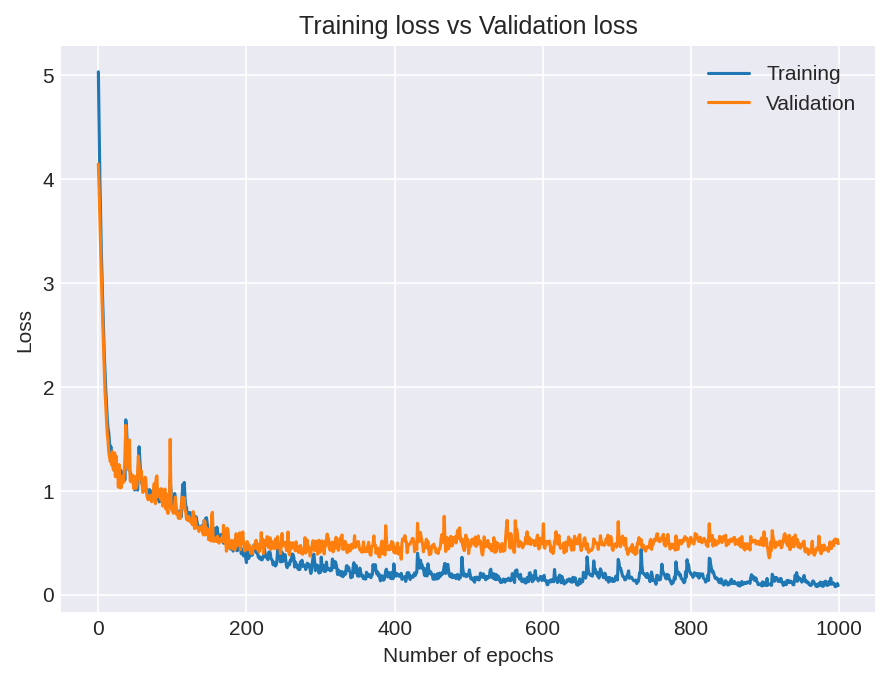

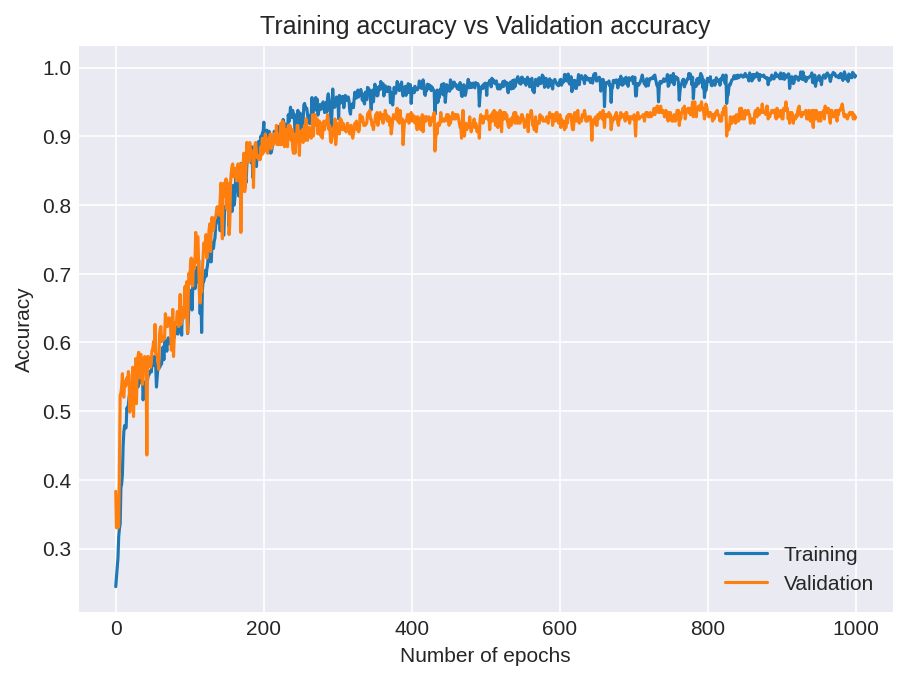

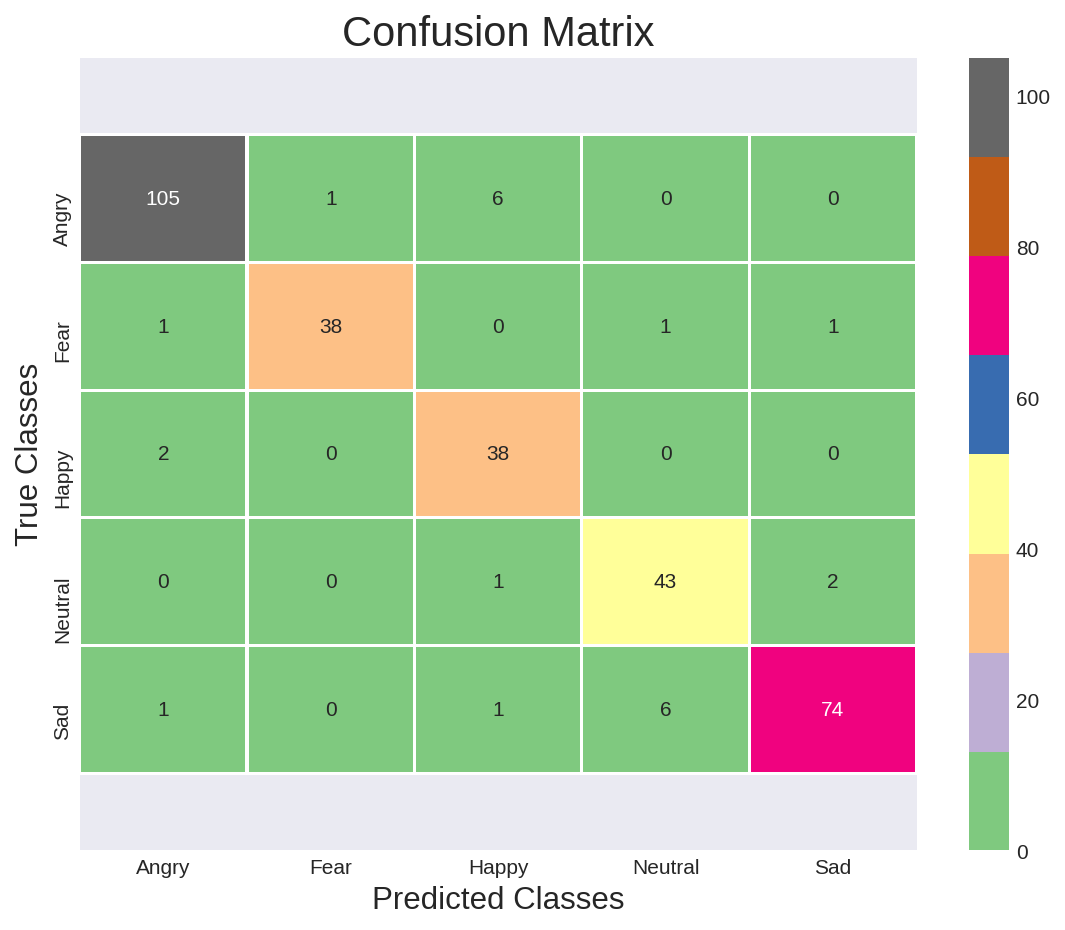

              precision    recall  f1-score   support

       Angry       0.96      0.94      0.95       112
        Fear       0.97      0.93      0.95        41
       Happy       0.83      0.95      0.88        40
     Neutral       0.86      0.93      0.90        46
         Sad       0.96      0.90      0.93        82

    accuracy                           0.93       321
   macro avg       0.92      0.93      0.92       321
weighted avg       0.93      0.93      0.93       321



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad']))

In [ ]:
#Accuarte class labels

In [ ]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,source,path
0,Fear,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Ab.wav
1,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/12a01Fb.wav
2,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/03a01Fa.wav
3,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/09a01Fa.wav
4,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Na.wav
5,Angry,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Wa.wav
6,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/13a01Fd.wav
7,Neutral,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/03a01Nc.wav
8,Angry,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Wc.wav
9,Happy,EMO,/content/drive/MyDrive/Speech Emotion analysis/Emo-db/08a01Fd.wav


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


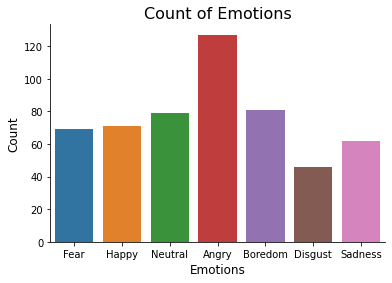

In [29]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12) 
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()  

In [16]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [17]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [18]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
       
    return result

In [19]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically
    
    return result

In [20]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), data_path.path.shape

(2140, 2140, (535,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,labels
0,0.118058,0.565005,0.608090,0.683121,0.617558,0.536719,0.544609,0.565097,0.586288,0.556638,0.535788,0.521537,0.521607,-239.242264,93.311470,-47.721405,36.792530,-29.406725,30.540400,-26.404978,-2.567815,-6.565616,-9.454045,-2.605035,-2.645095,-1.123081,0.106191,0.233874,0.168767,0.088874,0.031072,0.031221,0.397871,9.459945,11.387362,9.485535,16.230631,59.399960,35.644787,12.259502,...,0.316787,0.537943,0.480110,0.708013,0.568656,0.385182,0.467830,0.359173,0.150270,0.237734,0.319602,0.218449,0.201142,0.186315,0.148083,0.223006,0.282373,0.311500,0.298508,0.445633,0.315118,0.306816,0.295273,0.172138,0.084325,0.015300,0.000683,0.000005,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,Fear
1,0.159499,0.573767,0.600857,0.691580,0.649872,0.566836,0.556375,0.561781,0.584952,0.579911,0.540382,0.529151,0.536371,-212.458281,71.303091,-30.481553,19.917075,-16.839288,19.180154,-18.517549,-7.573117,-3.823415,-9.756145,-4.119056,-1.069780,-4.083046,0.106222,0.234373,0.168069,0.088786,0.030733,0.031965,0.397646,9.454449,11.388666,9.495469,16.227837,59.403681,35.644948,12.250106,...,0.316398,0.537562,0.481137,0.708676,0.567509,0.384902,0.468691,0.358894,0.150201,0.238689,0.320092,0.218630,0.201674,0.187551,0.148555,0.223557,0.282249,0.311300,0.298656,0.445160,0.315555,0.307073,0.295669,0.172210,0.084641,0.015526,0.000879,0.000173,0.000162,0.000162,0.000157,0.000151,0.000154,0.000155,0.000145,0.000163,0.000170,0.000166,0.000172,Fear
2,0.129947,0.479741,0.530497,0.620380,0.701526,0.583356,0.489940,0.490483,0.528225,0.563035,0.543836,0.546025,0.488869,-277.763794,95.098206,-47.637703,32.853813,-31.094694,29.501434,-36.599606,1.347704,-9.349730,-6.262607,-6.858923,-2.220073,-6.736476,0.051398,0.055435,0.053554,0.021962,0.008748,0.006275,0.009445,0.538023,2.605234,6.074339,4.441233,12.834837,15.815147,3.699942,...,0.028623,0.037766,0.057624,0.076188,0.139738,0.186121,0.069324,0.072744,0.087065,0.060644,0.037706,0.048544,0.054933,0.064526,0.025585,0.028049,0.038903,0.045632,0.046279,0.077440,0.063345,0.075133,0.041121,0.053084,0.036935,0.021848,0.011327,0.000532,0.000014,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,0.000006,0.000007,Fear
3,0.128188,0.508703,0.586469,0.702197,0.594640,0.483643,0.516429,0.542251,0.579736,0.562298,0.553694,0.485373,0.484502,-277.886475,95.166748,-49.346569,33.691082,-31.111177,30.956291,-36.058765,-0.091696,-9.122845,-5.356777,-5.549081,-2.720793,-5.709476,0.053169,0.060399,0.044571,0.018921,0.008483,0.005051,0.012949,0.899411,4.496017,6.565965,3.993485,13.024792,14.767900,3.861615,...,0.018193,0.071796,0.110694,0.111856,0.195477,0.138269,0.076853,0.049649,0.074115,0.025732,0.041997,0.092443,0.062046,0.048539,0.035789,0.036421,0.049161,0.074041,0.075512,0.060076,0.053002,0.068308,0.048778,0.047259,0.034073,0.023847,0.006954,0.000337,0.000007,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000005,0.000007,Fear
4,0.090625,0.486378,0.538183,0.593669,0.712791,0.803031,0.758678,0.711637,0.678423,0.650458,0.604287,0.523501,0.451379,-299.975983,123.833115,-58.514000,49.796654,-19.890055,-2.462753,-7.365324,5.748572,-25.684937,-2.324779,7.042671,-15.331325,2.479473,0.047949,0.018844,0.019758,0.039690,0.199644,0.933736,1.300369,0.301026,0.152289,0.781222,1.540226,2.140152,7.207627,6.451104,...,0.015172,0.009112,0.008126,0.005522,0.004459,0.003620,0.002776,0.005050,0.005268,0.003335,0.006582,0.005305,0.004916,0.003693,0.003385,0.003568,0.003856,0.003173,0.003193,0.002571,0.001496,0.001269,0.000919,0.000577,0.000365,0.000083,0.000006,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,Happy


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]
(1712, 155, 1)
(428, 155, 1)


(2140, 7)

In [30]:
lb.classes_

array(['Angry', 'Boredom', 'Disgust', 'Fear', 'Happy', 'Neutral',
       'Sadness'], dtype=object)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(x_train, y_train,batch_size=32, epochs=1000, validation_data=(x_test, y_test),callbacks=[checkpoint])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_31 (Conv1D)           (None, 155, 256)          2304      
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 74, 256)           1024      
_________________________________________________________________
dropout_34 (Dropout)         (None, 74, 256)           0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 37, 256)          

11/11 [==============================] - 0s 7ms/step - loss: 0.6304 - accuracy: 0.8442
Loss of the model is -  0.6303622722625732
11/11 [==============================] - 0s 6ms/step - loss: 0.6304 - accuracy: 0.8442
Accuracy of the model is -  84.42367315292358 %


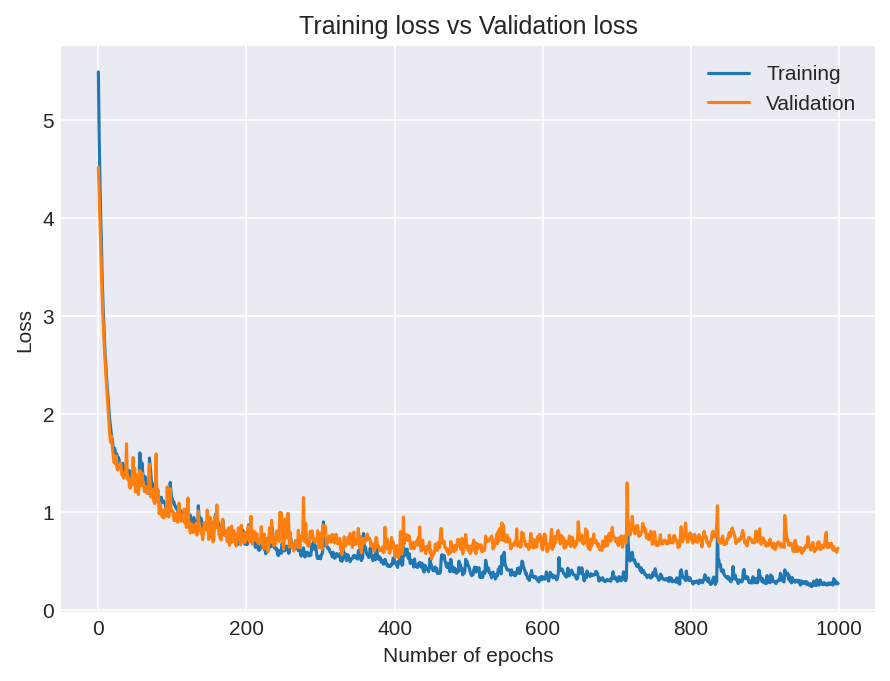

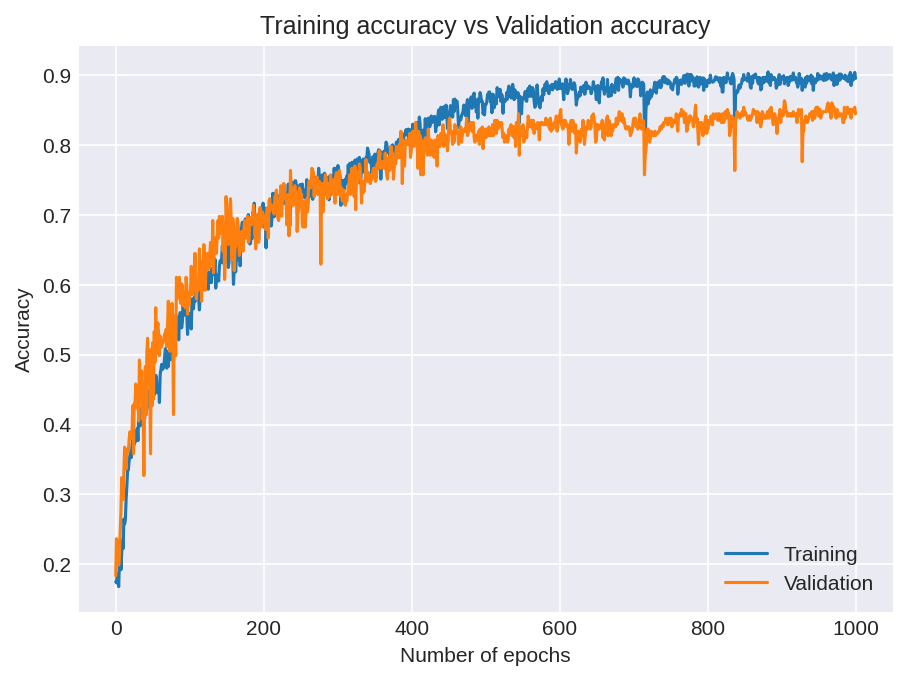

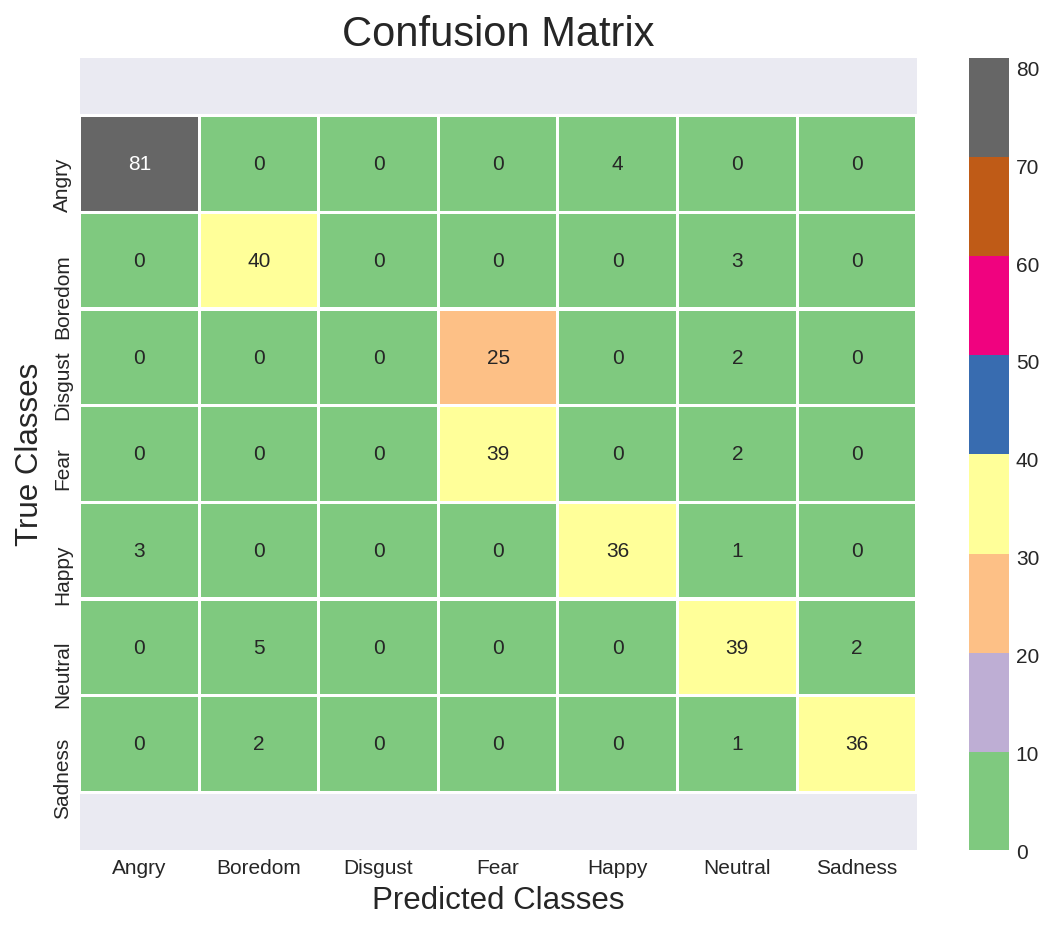

              precision    recall  f1-score   support

       Angry       0.96      0.95      0.96        85
     Boredom       0.85      0.93      0.89        43
     Disgust       0.00      0.00      0.00        27
        Fear       0.61      0.95      0.74        41
       Happy       0.90      0.90      0.90        40
     Neutral       0.81      0.85      0.83        46
     Sadness       0.95      0.92      0.94        39

    accuracy                           0.84       321
   macro avg       0.73      0.79      0.75       321
weighted avg       0.79      0.84      0.81       321



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Boredom', 'Disgust', 'Fear', 'Happy', 'Neutral','Sadness']))

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(x_train, y_train,batch_size=32, epochs=1000, validation_data=(x_test, y_test),callbacks=[checkpoint])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_39 (Conv1D)           (None, 155, 256)          2304      
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 74, 256)           1024      
_________________________________________________________________
dropout_43 (Dropout)         (None, 74, 256)           0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 37, 256)          

14/14 [==============================] - 0s 7ms/step - loss: 0.1976 - accuracy: 0.9860
Loss of the model is -  0.1976107954978943
14/14 [==============================] - 0s 7ms/step - loss: 0.1976 - accuracy: 0.9860
Accuracy of the model is -  98.5981285572052 %


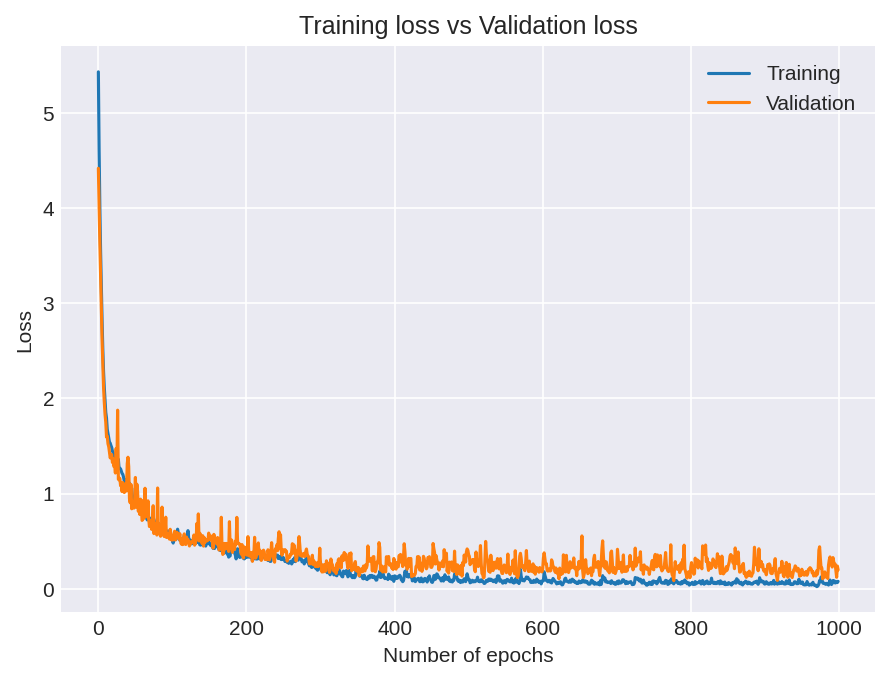

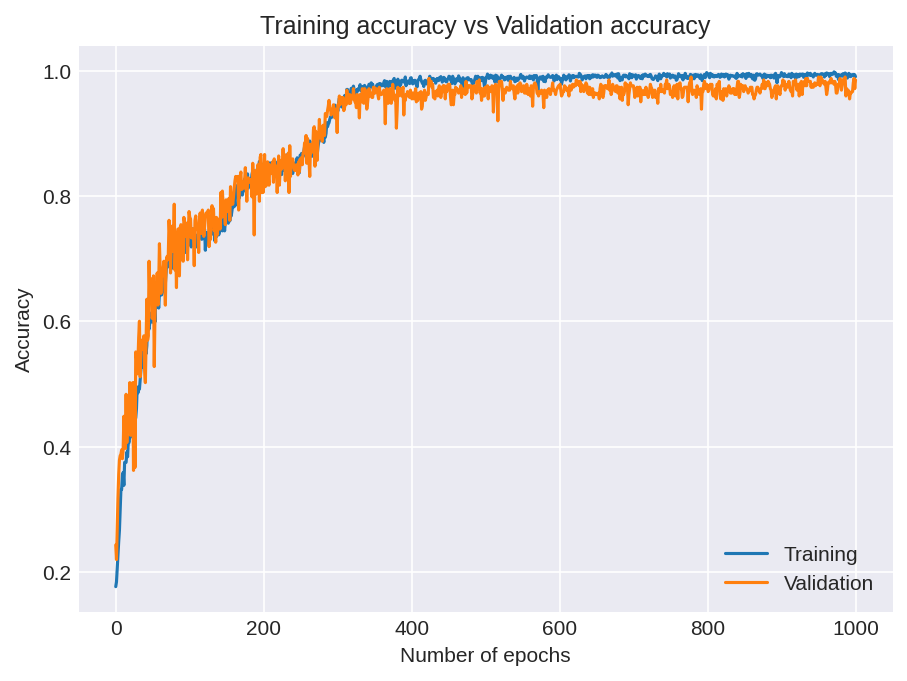

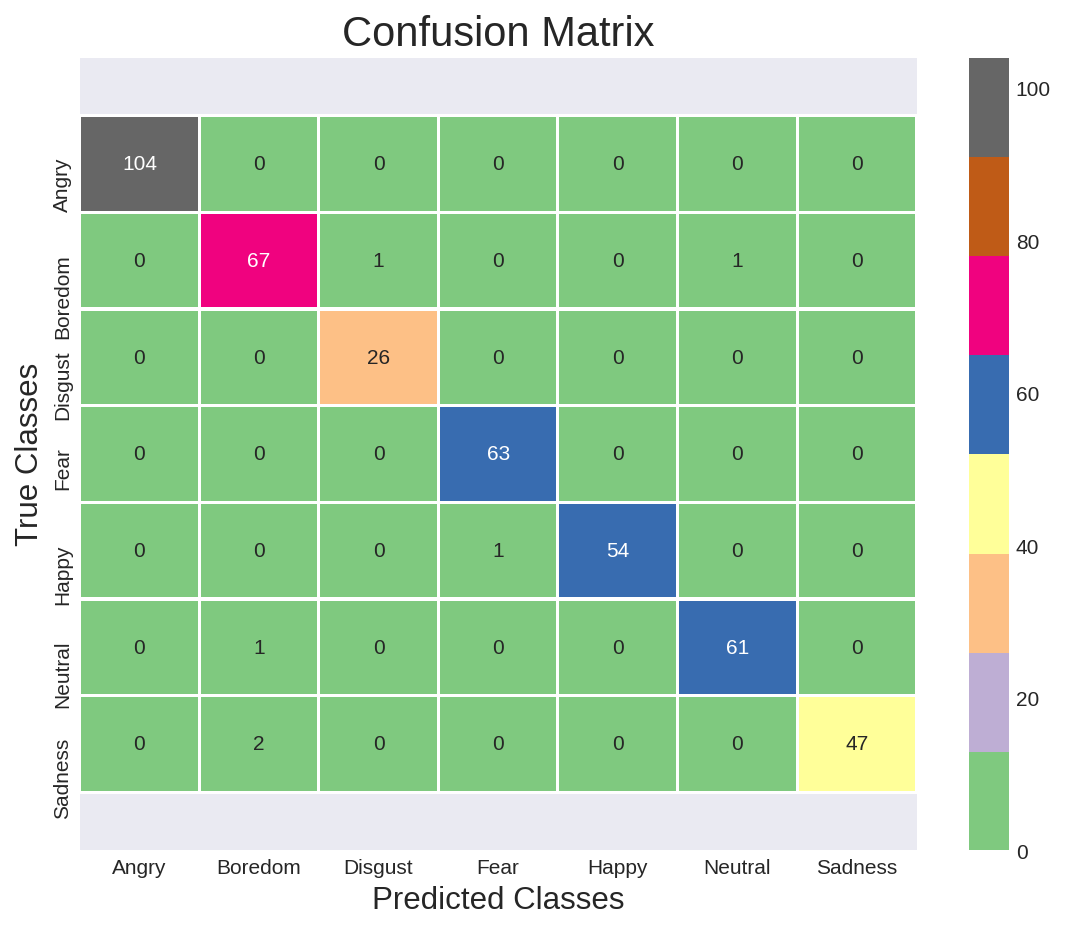

              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00       104
     Boredom       0.96      0.97      0.96        69
     Disgust       0.96      1.00      0.98        26
        Fear       0.98      1.00      0.99        63
       Happy       1.00      0.98      0.99        55
     Neutral       0.98      0.98      0.98        62
     Sadness       1.00      0.96      0.98        49

    accuracy                           0.99       428
   macro avg       0.98      0.99      0.98       428
weighted avg       0.99      0.99      0.99       428



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Boredom', 'Disgust', 'Fear', 'Happy', 'Neutral','Sadness']))

In [31]:
#CONV-LSTM

In [36]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(512))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(x_train, y_train,batch_size=32, epochs=1000, validation_data=(x_test, y_test),callbacks=[checkpoint])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 155, 256)          2304      
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 74, 256)           1024      
_________________________________________________________________
dropout_34 (Dropout)         (None, 74, 256)           0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 37, 256)          

14/14 [==============================] - 0s 7ms/step - loss: 0.2159 - accuracy: 0.9836
Loss of the model is -  0.2158588320016861
14/14 [==============================] - 0s 6ms/step - loss: 0.2159 - accuracy: 0.9836
Accuracy of the model is -  98.36448431015015 %


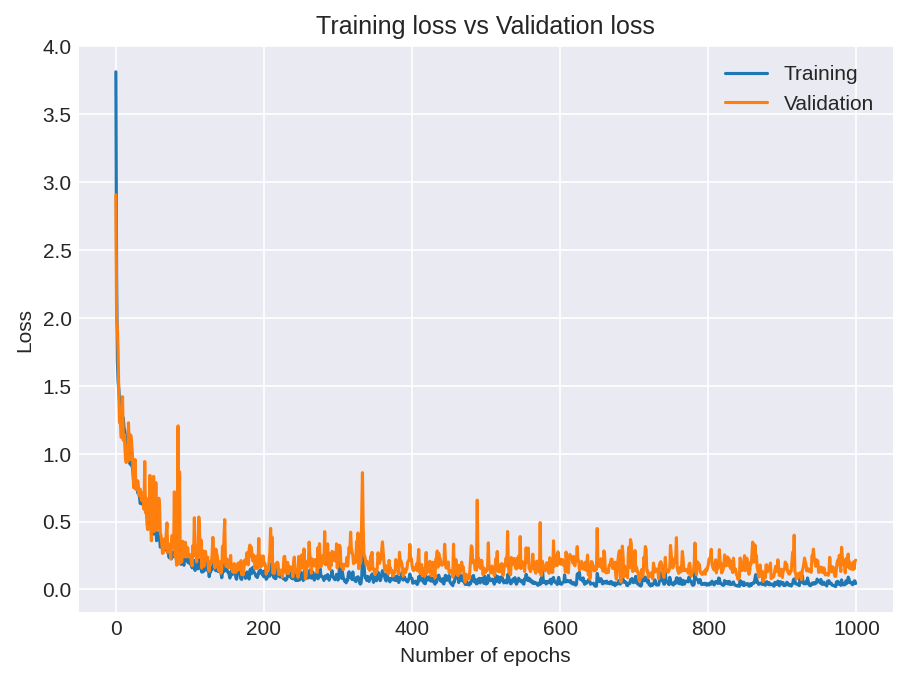

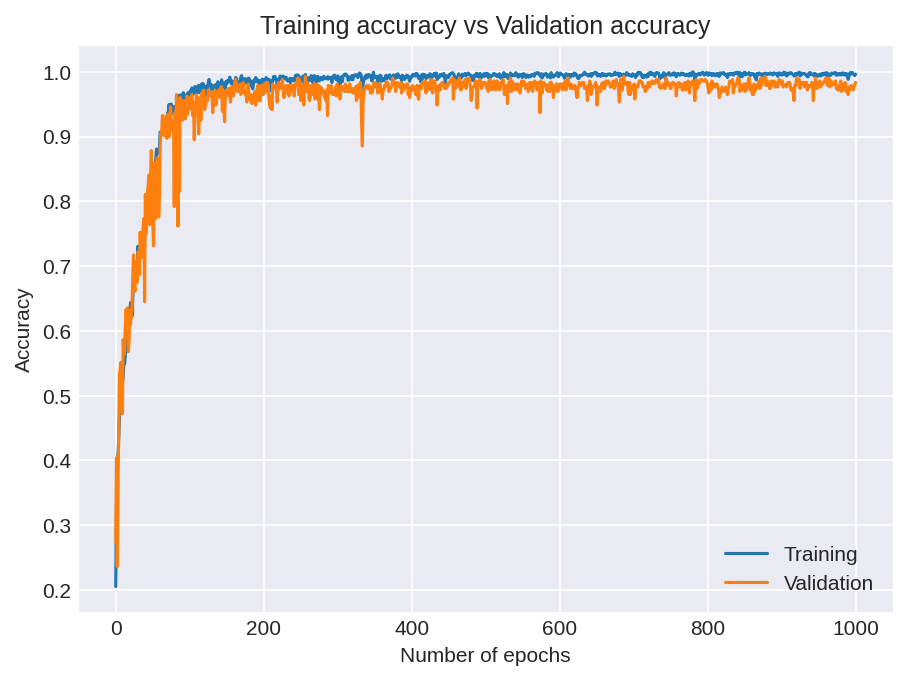

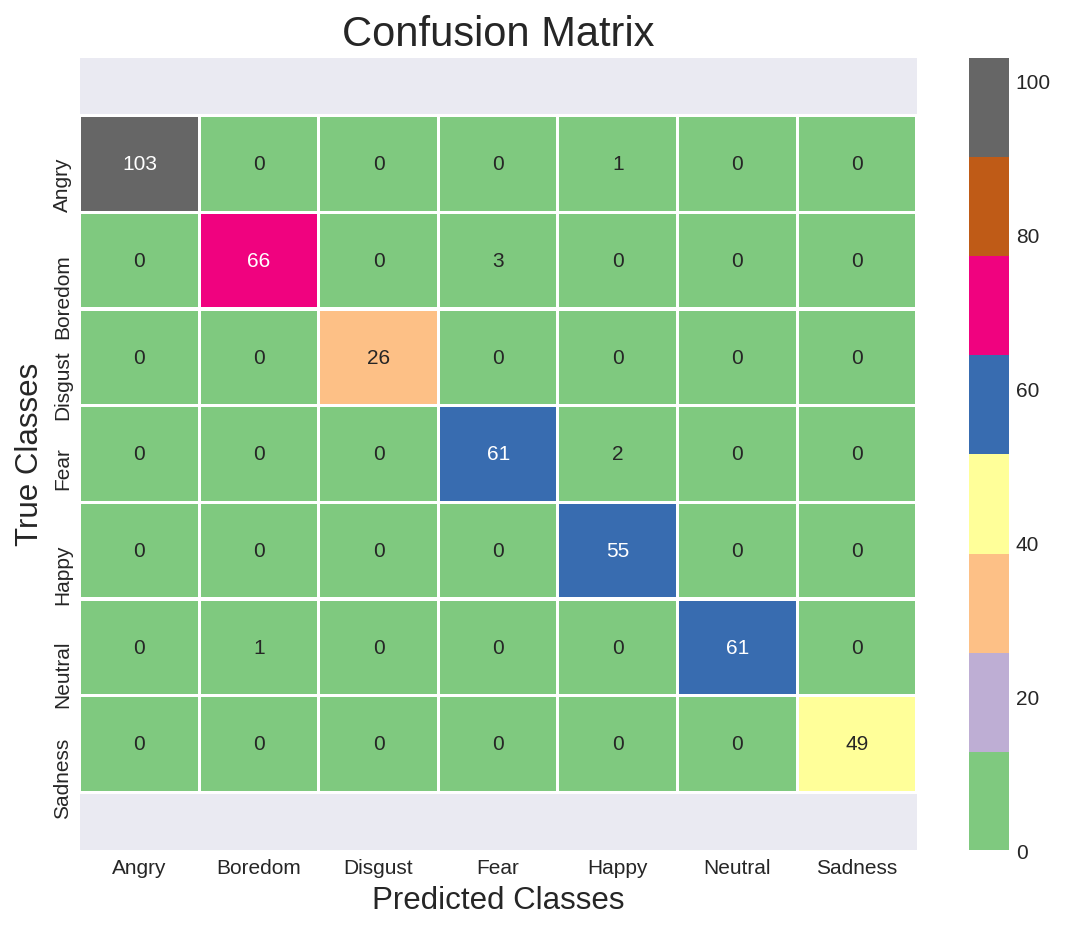

              precision    recall  f1-score   support

       Angry       1.00      0.99      1.00       104
     Boredom       0.99      0.96      0.97        69
     Disgust       1.00      1.00      1.00        26
        Fear       0.95      0.97      0.96        63
       Happy       0.95      1.00      0.97        55
     Neutral       1.00      0.98      0.99        62
     Sadness       1.00      1.00      1.00        49

    accuracy                           0.98       428
   macro avg       0.98      0.99      0.98       428
weighted avg       0.98      0.98      0.98       428



In [38]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Boredom', 'Disgust', 'Fear', 'Happy', 'Neutral','Sadness']))